# Road traffic visualization

In [64]:
import pandas as pd
import numpy as np

# Import data

In [65]:
## Import road traffic data
roads = ['N1', 'N102', 'N104', 'N105', 'N106', 'N2', 'N204', 'N207', 'N208']
traffic_data = {}

file_path = '../data/processed/'

for road in roads:
    file_name = f"{file_path + road + '_traffic'}.csv"  # Assuming each road has a corresponding CSV file named after it
    try:
        traffic_data[road] = pd.read_csv(file_name)
    except FileNotFoundError:
        print(f"File {file_name} not found.")

# traffic_data

In [66]:
## Import lrp data
file_name = 'demo_100.csv'
df_demo = pd.read_csv('../data/processed/' + file_name) #df_road_N1andN2

#df_demo

# Infrastructure Plot

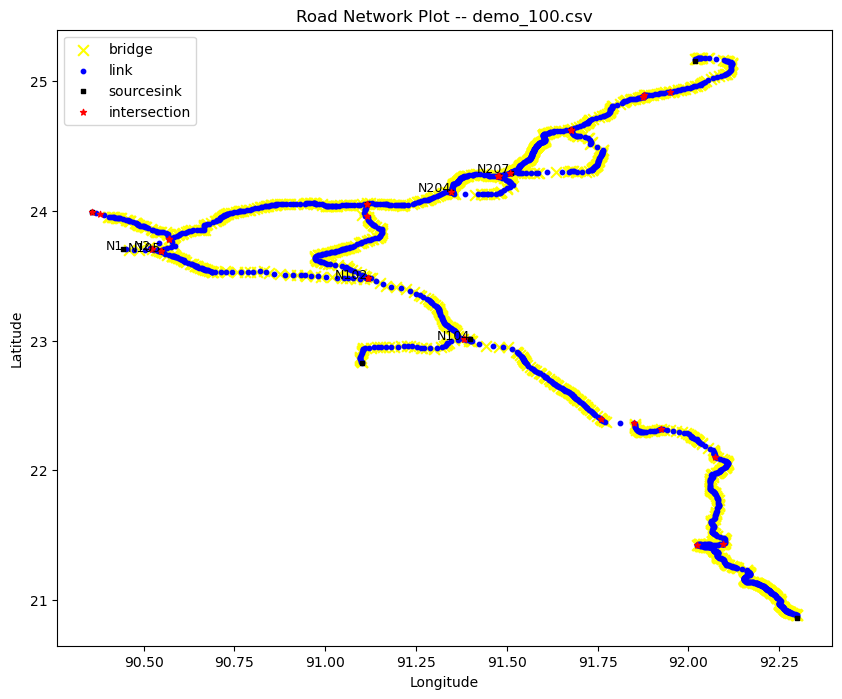

['N1' 'N2' 'N105' 'N102' 'N104' 'N204' 'N207']


In [67]:
import matplotlib.pyplot as plt

# Define colors and markers for each model type
colors = {
    'bridge': 'yellow',
    'link': 'blue',
    'sourcesink': 'black',
    'intersection': 'red'
}

markers = {
    'bridge': 'x',
    'link': 'o',
    'sourcesink': 's',
    'intersection': '*'
}

marker_sizes = {
    'bridge': 60,
    'link': 10,
    'sourcesink': 10,
    'intersection': 20
}

# Create a scatter plot
plt.figure(figsize=(10, 8))

for model_type, color in colors.items():
    subset = df_demo[df_demo['model_type'] == model_type]
    plt.scatter(subset['lon'], subset['lat'], c=color, label=model_type, s=marker_sizes[model_type], marker=markers[model_type])

# Annotate the first data point of each road with the road name
for road in df_demo['road'].unique():
    first_point = df_demo[df_demo['road'] == road].iloc[0]
    plt.text(first_point['lon'], first_point['lat'], road, fontsize=9, ha='right')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Road Network Plot -- ' + file_name)
plt.legend()
plt.show()

print(df_demo.road.unique())

C:\Users\Move\AppData\Local\Temp\ipykernel_28264\708589594.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', len(df_demo['road'].unique()))


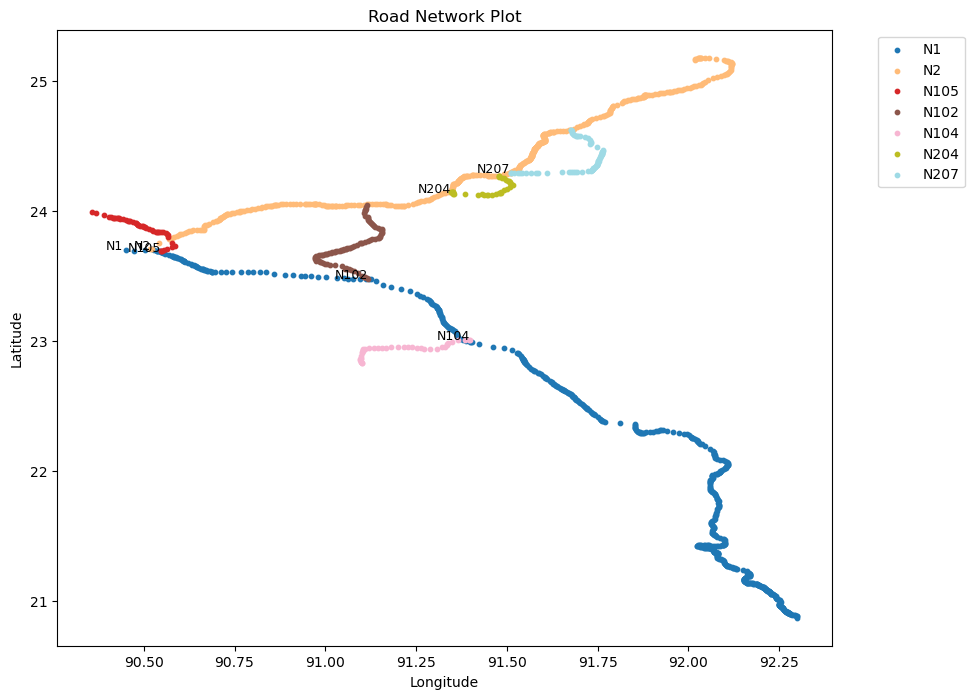

In [68]:
import matplotlib.pyplot as plt

# Define a color map for different roads
color_map = plt.cm.get_cmap('tab20', len(df_demo['road'].unique()))

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot each road with a different color
for i, road in enumerate(df_demo['road'].unique()):
    subset = df_demo[(df_demo['road'] == road) & (df_demo['model_type'] == 'link')]
    plt.scatter(subset['lon'], subset['lat'], c=[color_map(i)], label=road, s=10, marker='o')

# Annotate the first data point of each road with the road name
for road in df_demo['road'].unique():
    first_point = df_demo[df_demo['road'] == road].iloc[0]
    plt.text(first_point['lon'], first_point['lat'], road, fontsize=9, ha='right')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Road Network Plot')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Calculate chainage as a new column in df_demo

In [69]:
df_demo.head()

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN


In [70]:
df_demo['chainage'] = df_demo.groupby('road')['length'].cumsum()
df_demo.head()

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,4.0
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1804.0
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1815.3
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4940.3
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4946.9


In [71]:
# Convert 'chainage' unit to km
df_demo['chainage'] = df_demo['chainage'] / 1000  # Convert to km

In [72]:
df_demo[df_demo['road'] == 'N1']

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.80400
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.81530
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.94030
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.94690
...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1.5,C,20.883070,92.298163,NaN,bridge,11298,N1,NaN,473.18646
1299,1299,247.0,NaN,20.882028,92.297970,0,link,11299,N1,NaN,473.43346
1300,1300,35.9,C,20.880985,92.297777,NaN,bridge,11300,N1,NaN,473.46936
1301,1301,2388.0,NaN,20.871951,92.297930,0,link,11301,N1,NaN,475.85736


# Map demo_100.csv & traffic data

In [73]:
# Create a new column in df_demo to store the traffic data.
# This must be done based on traffic_data[road]['S_Chainage'] and traffic_data[road]['E_Chainage'] that correspond to the road in df_demo.
# if the df_demo['chainage'] is between the S_Chainage and E_Chainage, then we can assign the traffic data to df_demo['traffic'] = traffic_data[road]['(AADT)']

## Load traffic data into df_demo

for road in df_demo['road'].unique():
    # Get the traffic data for the current road
    road_traffic_data = traffic_data[road]
    
    # Initialize the traffic column with NaN for the current road
    df_demo.loc[df_demo['road'] == road, 'traffic'] = np.nan
    
    # Iterate over each row in the traffic data for the current road
    for _, traffic_row in road_traffic_data.iterrows():
        # Update the traffic column where chainage is within the range
        df_demo.loc[
            (df_demo['road'] == road) &
            (df_demo['chainage'] >= traffic_row['S_Chainage']) &
            (df_demo['chainage'] <= traffic_row['E_Chainage']),
            'traffic'
        ] = traffic_row['(AADT)']

    # if there are rows with NaN traffic values, we can fill them with the end of the last traffic data
    # Get the last traffic data row for the current road
    last_traffic_row = road_traffic_data.iloc[-1]
    last_chainage = last_traffic_row['E_Chainage']
    last_traffic = last_traffic_row['(AADT)']
    # Fill NaN values with the last traffic data
    df_demo.loc[
        (df_demo['road'] == road) &
        (df_demo['chainage'] > last_chainage) &
        (df_demo['traffic'].isna()),
        'traffic'
    ] = last_traffic


In [74]:
## Load heavy truck data into df_demo

for road in df_demo['road'].unique():
    # Get the traffic data for the current road
    road_traffic_data = traffic_data[road]
    
    # Initialize the heavy truck column with NaN for the current road
    df_demo.loc[df_demo['road'] == road, 'heavy_truck'] = np.nan
    
    # Iterate over each row in the traffic data for the current road
    for _, traffic_row in road_traffic_data.iterrows():
        # Update the heavy truck column where chainage is within the range
        df_demo.loc[
            (df_demo['road'] == road) &
            (df_demo['chainage'] >= traffic_row['S_Chainage']) &
            (df_demo['chainage'] <= traffic_row['E_Chainage']),
            'heavy_truck'
        ] = traffic_row['Heavy Truck']

    # if there are rows with NaN heavy truck values, we can fill them with the end of the last traffic data
    # Get the last traffic data row for the current road
    last_traffic_row = road_traffic_data.iloc[-1]
    last_chainage = last_traffic_row['E_Chainage']
    last_heavy_truck = last_traffic_row['Heavy Truck']
    # Fill NaN values with the last heavy truck data
    df_demo.loc[
        (df_demo['road'] == road) &
        (df_demo['chainage'] > last_chainage) &
        (df_demo['heavy_truck'].isna()),
        'heavy_truck'
    ] = last_heavy_truck


In [75]:
df_demo

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.80400,19357.0,402.0
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.81530,19357.0,402.0
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.94030,16657.0,85.0
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.94690,16657.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,3007,6.0,A,24.622628,91.678091,NaN,bridge,13007,N207,NaN,68.40589,5329.0,31.0
2833,3008,425.0,NaN,24.624480,91.677809,0,link,13008,N207,NaN,68.83089,5329.0,31.0
2834,3009,4.0,NaN,24.626333,91.677527,N2,intersection,13009,N207,NaN,68.83489,5329.0,31.0
2835,3010,425.0,NaN,24.626333,91.677527,0,link,13010,N207,NaN,69.25989,5329.0,31.0


In [76]:
# print average trafic for each road
df_demo.groupby('road')['traffic'].mean()

road
N1       9644.207982
N102     8709.572193
N104     9109.698795
N105    10607.742574
N2       8946.059937
N204     2628.000000
N207     5329.000000
Name: traffic, dtype: float64

In [77]:
# print rows with model_type = 'sourcesink'
df_demo[df_demo['model_type'] == 'sourcesink']

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0
1302,1302,4.0,NaN,20.862917,92.298083,NaN,sourcesink,11302,N1,NaN,475.86136,5820.0,24.0
1303,1303,4.0,NaN,23.705917,90.521444,NaN,sourcesink,11303,N2,NaN,0.00400,24659.0,239.0
2253,2253,4.0,NaN,25.157056,92.017638,NaN,sourcesink,12253,N2,NaN,294.96109,5240.0,462.0
2254,2254,4.0,NaN,23.690416,90.546611,NaN,sourcesink,12254,N105,NaN,0.00400,14904.0,338.0
2354,2354,4.0,NaN,23.989527,90.358222,NaN,sourcesink,12354,N105,NaN,52.36850,11875.0,328.0
2355,2355,4.0,NaN,23.478972,91.118194,NaN,sourcesink,12355,N102,NaN,0.00400,9708.0,231.0
2541,2541,4.0,NaN,24.050611,91.114667,NaN,sourcesink,12541,N102,NaN,86.27534,12771.0,98.0
2542,2542,4.0,NaN,23.009667,91.399416,NaN,sourcesink,12542,N104,NaN,0.00400,9385.0,90.0
2624,2624,4.0,NaN,22.825749,91.101444,NaN,sourcesink,12624,N104,NaN,50.52866,8886.0,19.0


# Traffic plot

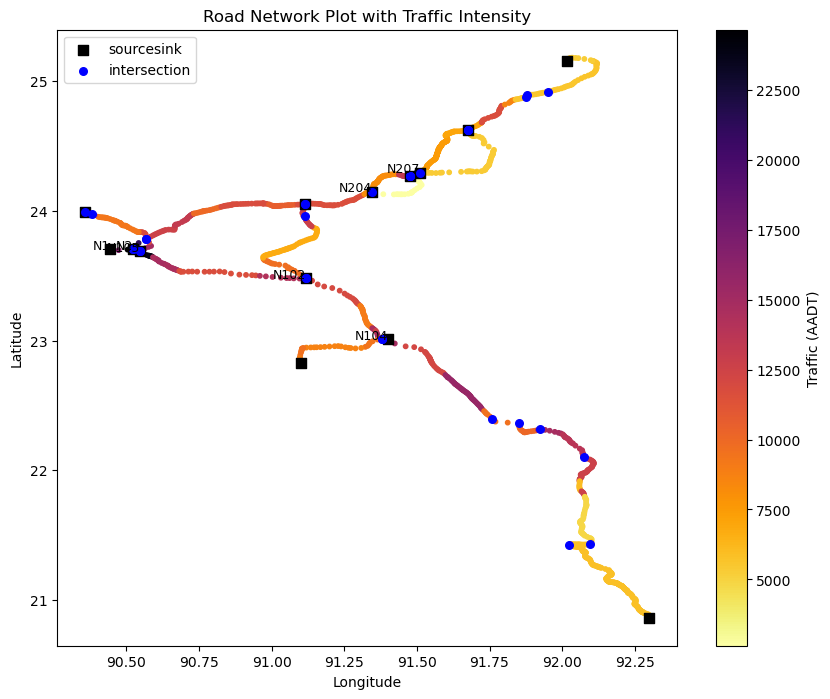

In [78]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Create a scatter plot with traffic-based coloring
plt.figure(figsize=(10, 8))

# Normalize the traffic values for the colormap
norm = mcolors.Normalize(vmin=df_demo['traffic'].min(), vmax=df_demo['traffic'].max())
cmap = cm.inferno_r

# Plot each road
for road in df_demo['road'].unique():
    subset = df_demo[(df_demo['road'] == road) & (df_demo['model_type'] == 'link')]
    plt.scatter(
        subset['lon'], 
        subset['lat'], 
        c=subset['traffic'], 
        cmap=cmap, 
        norm=norm, 
        s=10, 
        marker='o', 
        label=road
    )

## Plot sourcesink and intersection points with different markers
# Plot sourcesink points
subset_sourcesink = df_demo[df_demo['model_type'] == 'sourcesink']
plt.scatter(
    subset_sourcesink['lon'], 
    subset_sourcesink['lat'], 
    c='black', 
    s=50, 
    marker='s',  # Use 's' for square marker
    label='sourcesink'
)
# Plot intersection points
subset_intersection = df_demo[df_demo['model_type'] == 'intersection']
plt.scatter(
    subset_intersection['lon'], 
    subset_intersection['lat'], 
    c='blue', 
    s=30, 
    marker='o',
    label='intersection'
)
# Add legend for sourcesink and intersection
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[-2:], labels[-2:], loc='upper left')


# Annotate the first data point of each road with the road name
for road in df_demo['road'].unique():
    first_point = df_demo[df_demo['road'] == road].iloc[0]
    plt.text(first_point['lon'], first_point['lat'], road, fontsize=9, ha='right')

# Add a colorbar to show the traffic scale
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(df_demo['traffic'])  # Associate the traffic data with the ScalarMappable
cbar = plt.colorbar(sm, ax=plt.gca(), label='Traffic (AADT)')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Road Network Plot with Traffic Intensity')
# Show only the legend for sourcesink
plt.show()


# Normalize heavy truck data

In [79]:
# Min-max normalization for 'heavy truck' column
df_demo['heavy_truck_normalized'] = (df_demo['heavy_truck'] - df_demo['heavy_truck'].min()) / (df_demo['heavy_truck'].max() - df_demo['heavy_truck'].min())

In [80]:
df_demo

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0,0.542317
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.80400,19357.0,402.0,0.330320
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.81530,19357.0,402.0,0.330320
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.94030,16657.0,85.0,0.069844
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.94690,16657.0,85.0,0.069844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,3007,6.0,A,24.622628,91.678091,NaN,bridge,13007,N207,NaN,68.40589,5329.0,31.0,0.025472
2833,3008,425.0,NaN,24.624480,91.677809,0,link,13008,N207,NaN,68.83089,5329.0,31.0,0.025472
2834,3009,4.0,NaN,24.626333,91.677527,N2,intersection,13009,N207,NaN,68.83489,5329.0,31.0,0.025472
2835,3010,425.0,NaN,24.626333,91.677527,0,link,13010,N207,NaN,69.25989,5329.0,31.0,0.025472


# Calculate truck generation frequency

In [81]:
# Define constants
T_max = 10
T_min = 2

# Calculate the maximum traffic value
traffic_max = df_demo['traffic'].max()

# Calculate the truck generation frequency and round it to the nearest integer
# interval_i = T_max * (1 - (traffic_i / traffic_max)) + T_min
df_demo['truck_generation_frequency'] = df_demo.apply(
    lambda row: round(T_max * (1 - (row['traffic'] / traffic_max)) + T_min) 
    if row['model_type'] == 'sourcesink' and not pd.isna(row['traffic']) else None,
    axis=1
)

df_demo[df_demo['model_type'] == 'sourcesink']

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0,0.542317,3.0
1302,1302,4.0,NaN,20.862917,92.298083,NaN,sourcesink,11302,N1,NaN,475.86136,5820.0,24.0,0.019721,10.0
1303,1303,4.0,NaN,23.705917,90.521444,NaN,sourcesink,11303,N2,NaN,0.00400,24659.0,239.0,0.196385,2.0
2253,2253,4.0,NaN,25.157056,92.017638,NaN,sourcesink,12253,N2,NaN,294.96109,5240.0,462.0,0.379622,10.0
2254,2254,4.0,NaN,23.690416,90.546611,NaN,sourcesink,12254,N105,NaN,0.00400,14904.0,338.0,0.277732,6.0
2354,2354,4.0,NaN,23.989527,90.358222,NaN,sourcesink,12354,N105,NaN,52.36850,11875.0,328.0,0.269515,7.0
2355,2355,4.0,NaN,23.478972,91.118194,NaN,sourcesink,12355,N102,NaN,0.00400,9708.0,231.0,0.189811,8.0
2541,2541,4.0,NaN,24.050611,91.114667,NaN,sourcesink,12541,N102,NaN,86.27534,12771.0,98.0,0.080526,7.0
2542,2542,4.0,NaN,23.009667,91.399416,NaN,sourcesink,12542,N104,NaN,0.00400,9385.0,90.0,0.073952,8.0
2624,2624,4.0,NaN,22.825749,91.101444,NaN,sourcesink,12624,N104,NaN,50.52866,8886.0,19.0,0.015612,8.0


# Calculate random sink probability

In [82]:
# Filter the rows where model_type is 'sourcesink'
sourcesink_traffic = df_demo[df_demo['model_type'] == 'sourcesink']['traffic']

# Normalize the traffic values to calculate the sink selection probability for sourcesink only
df_demo['sink_selection_probability'] = df_demo.apply(
    lambda row: row['traffic'] / sourcesink_traffic.sum() if row['model_type'] == 'sourcesink' else None,
    axis=1
)

# Verify the sum of probabilities
print("Sum of sink selection probabilities:", df_demo[df_demo['model_type'] == 'sourcesink']['sink_selection_probability'].sum())

Sum of sink selection probabilities: 1.0


In [83]:
df_demo[df_demo['model_type'] == 'sourcesink']

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0,0.542317,3.0,0.153071
1302,1302,4.0,NaN,20.862917,92.298083,NaN,sourcesink,11302,N1,NaN,475.86136,5820.0,24.0,0.019721,10.0,0.041365
1303,1303,4.0,NaN,23.705917,90.521444,NaN,sourcesink,11303,N2,NaN,0.00400,24659.0,239.0,0.196385,2.0,0.175261
2253,2253,4.0,NaN,25.157056,92.017638,NaN,sourcesink,12253,N2,NaN,294.96109,5240.0,462.0,0.379622,10.0,0.037243
2254,2254,4.0,NaN,23.690416,90.546611,NaN,sourcesink,12254,N105,NaN,0.00400,14904.0,338.0,0.277732,6.0,0.105928
2354,2354,4.0,NaN,23.989527,90.358222,NaN,sourcesink,12354,N105,NaN,52.36850,11875.0,328.0,0.269515,7.0,0.084400
2355,2355,4.0,NaN,23.478972,91.118194,NaN,sourcesink,12355,N102,NaN,0.00400,9708.0,231.0,0.189811,8.0,0.068998
2541,2541,4.0,NaN,24.050611,91.114667,NaN,sourcesink,12541,N102,NaN,86.27534,12771.0,98.0,0.080526,7.0,0.090768
2542,2542,4.0,NaN,23.009667,91.399416,NaN,sourcesink,12542,N104,NaN,0.00400,9385.0,90.0,0.073952,8.0,0.066703
2624,2624,4.0,NaN,22.825749,91.101444,NaN,sourcesink,12624,N104,NaN,50.52866,8886.0,19.0,0.015612,8.0,0.063156


# Save file

In [84]:
df_demo

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,chainage,traffic,heavy_truck,heavy_truck_normalized,truck_generation_frequency,sink_selection_probability
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,0.00400,21537.0,660.0,0.542317,3.0,0.153071
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,1.80400,19357.0,402.0,0.330320,NaN,NaN
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,1.81530,19357.0,402.0,0.330320,NaN,NaN
3,3,3125.0,NaN,23.696701,90.473318,0,link,10003,N1,NaN,4.94030,16657.0,85.0,0.069844,NaN,NaN
4,4,6.6,A,23.694664,90.487775,NaN,bridge,10004,N1,NaN,4.94690,16657.0,85.0,0.069844,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,3007,6.0,A,24.622628,91.678091,NaN,bridge,13007,N207,NaN,68.40589,5329.0,31.0,0.025472,NaN,NaN
2833,3008,425.0,NaN,24.624480,91.677809,0,link,13008,N207,NaN,68.83089,5329.0,31.0,0.025472,NaN,NaN
2834,3009,4.0,NaN,24.626333,91.677527,N2,intersection,13009,N207,NaN,68.83489,5329.0,31.0,0.025472,NaN,NaN
2835,3010,425.0,NaN,24.626333,91.677527,0,link,13010,N207,NaN,69.25989,5329.0,31.0,0.025472,NaN,NaN


In [85]:
# Save the updated DataFrame to a new CSV file
df_demo.to_csv('../data/processed/demo_100_with_traffic.csv', index=False)